# Plot CREG12.L75 configuration fields 

In [1]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


>> ### Function definition START

In [40]:
def Arc_Bat(ztype='isol1000') :

        # To plot bathymetry isobath.
        
        locpath='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
        locfile='bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'iso2' :
                vmin=1500. ; vmax=2500.
                contours=[500.,2000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        # To plot over the North Greenland and Svalbard
#        m = Basemap(projection='npstere',boundinglat=80,lon_0=30, resolution='i')
        # To plot over the North Atltic 
        m = Basemap(width=2100000,height=1000000,lat_1=30.,lat_2=70,lon_0=-45,lat_0=60, \
                    projection='aea',resolution='i')
        
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=1.,levels=contours, colors='black', alpha=0.9)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=12)

        return m, X, Y


In [41]:
def Arc_plot(lon,lat,tab,zinfo):
        
        rcParams['font.family']='serif'
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        # To plot over the North Greenland and Svalbard
#        m = Basemap(projection='npstere',boundinglat=80,lon_0=30, resolution='i')
        # To plot over the North Atltic 
        m = Basemap(width=2100000,height=1000000,lat_1=30.,lat_2=70,lon_0=-45,lat_0=60, \
            projection='aea',resolution='i')

        zfontsize=12.
        m.drawparallels(np.arange(-90.,91.,2.),labels=[True,True,False,False], size=zfontsize, linewidth=0.3)
        m.drawmeridians(np.arange(-180.,181.,5.),labels=[False,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
        m.fillcontinents(color='grey',lake_color='white')

        zlim=zinfo['nam_lim']
        zscale=zinfo['nam_scal']

        pal = plt.cm.get_cmap('Spectral_r')
        norm = mpl.colors.Normalize(vmin=zlim[0], vmax=zlim[1])
        contours=np.arange(zlim[0],zlim[1]+zlim[2]/2.,zlim[2]/2.)
        myticks=np.arange(zlim[0],zlim[1]+zlim[2],zlim[2]/2.)

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                cbar = plt.colorbar(C,format='%.3f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zinfo['units'],fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)
        
        plt.title(zinfo['nam_var'],fontsize=zfontsize)

        return

In [70]:
def Arc_plotVec(lon,lat,tabX,tabY,zinfo):
        #
        rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        # To plot over the North Greenland and Svalbard 
        #m = Basemap(projection='npstere',boundinglat=80,lon_0=30, resolution='i')
        # To plot over the North Atltic 
        m = Basemap(width=2100000,height=1000000,lat_1=30.,lat_2=70,lon_0=-45,lat_0=60, \
                    projection='aea',resolution='i')

        zfontsize=12.
        m.drawparallels(np.arange(-90.,91.,2.),labels=[True,True,False,False], size=zfontsize, linewidth=0.3)
        m.drawmeridians(np.arange(-180.,181.,5.),labels=[False,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
        m.fillcontinents(color='grey',lake_color='white')
    
        X,Y = m(lon,lat)
        geo_ptX,geo_ptY=m(-46.,63.)

        TSH=False
        if TSH:
            print('>>>>>>>       CAUTION A TRESHOLD IS APPLIED TO VECTOR COMPONENTS')


            print('Before applying a treshold on vector components')
            print('U max:',np.nanmax(tabX),'U min:', np.nanmin(tabX))
            print('V max:',np.nanmax(tabY),'V min:', np.nanmin(tabY))

            if zinfo['nam_var'] == 'winvel' :
                ztreshold=5.  
            else:
                ztreshold=0.1  
            Hvalx=np.where(np.abs(tabX) > ztreshold) ;  Hvaly=np.where(np.abs(tabY) > ztreshold)
            tabX[Hvalx]=0.0 ; tabY[Hvalx]=0.0
            tabX[Hvaly]=0.0 ; tabY[Hvaly]=0.0
            #tabX[np.where(tabY > 0.1 )]=0.0 ; tabY[np.where(tabY > 0.1 )]=0.0
            print('After applying a treshold on vector components')
            print('U max:',np.nanmax(tabX),'U min:', np.nanmin(tabX))
            print('V max:',np.nanmax(tabY),'V min:', np.nanmin(tabY))


        # To plot 1 vector over x to lighten the plot
        unsx=5
        yy = np.arange(0, Y.shape[0], unsx)
        xx = np.arange(0, X.shape[1], unsx)
        points = np.meshgrid(yy, xx)
        
        zlim=zinfo['nam_lim']
        zscale=zinfo['nam_scal']
        
        pal = plt.cm.get_cmap('Spectral_r')
        norm = mpl.colors.Normalize(vmin=zlim[0], vmax=zlim[1])
        contours=np.arange(zlim[0],zlim[1]+zlim[2],zlim[2])
        myticks=contours
        mod = np.sqrt(tabX*tabX + tabY*tabY)
        
        C = m.contourf(X,Y,mod,contours,cmap=pal,norm=norm,extend='both')
        if zinfo['nam_var'] != 'icethic' :
            #V = m.quiver(X[points],Y[points],tabX[points],tabY[points],mod[points],cmap=plt.cm.autumn,scale=zscale)
            V = m.quiver(X[points],Y[points],tabX[points],tabY[points],scale=zscale, \
                         scale_units=None, units='width', angles='uv',\
                         pivot='mid')
        
            qk=plt.quiverkey(V,geo_ptX,geo_ptY,zinfo['nam_norm'],str(zinfo['nam_norm'])+zinfo['units'],\
               coordinates='data',labelsep=0.05,fontproperties={'size':12})
        
        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                cbar = plt.colorbar(C,format='%.3f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zinfo['units'],fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)
        
        plt.title(zinfo['nam_var'],fontsize=zfontsize)

        return

>> ### Function definition END

5 model grid types for the configuration CREG12.L75-REF08: 
- gridT
- gridU
- gridV
- gridW
- icemod

>> ## Read data

In [65]:
# Ref experiment data
CONFIG='CREG12.L75'
CASE='REF08'

DATA_PATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/5d/'
year=2011
ds_ice=xr.open_mfdataset(DATA_PATH+str(year)+'/'+CONFIG+'-'+CASE+'_y2011m03d26.5d_icemod.nc')
ds_Uice=xr.open_mfdataset(DATA_PATH+str(year)+'/'+CONFIG+'-'+CASE+'_y2011m03d26.5d_gridU.nc')
ds_Vice=xr.open_mfdataset(DATA_PATH+str(year)+'/'+CONFIG+'-'+CASE+'_y2011m03d26.5d_gridV.nc')
ds_Toce=xr.open_mfdataset(DATA_PATH+str(year)+'/'+CONFIG+'-'+CASE+'_y2011m03d26.5d_gridT.nc')


# Gather different fields from different files into a single Dataset
ds_Glo=xr.Dataset()
# Surface ocean stress 
ds_Glo['sozotaux']=ds_Uice['sozotaux']
ds_Glo['sometauy']=ds_Vice['sometauy']

# Select the vertical level 39 for ocean velocities
zlev=0
ds_Glo['vozocrtx']=ds_Uice['vozocrtx'][:,zlev,:,:]
ds_Glo['vomecrty']=ds_Vice['vomecrty'][:,zlev,:,:]

# Select the vertical level 39 for ocean temperature & salinity
ds_Glo['votemper']=ds_Toce['votemper'][:,zlev,:,:]
ds_Glo['vosaline']=ds_Toce['vosaline'][:,zlev,:,:]


# Grid coordinates
ds_Glo['nav_lat']=ds_ice['nav_lat']
ds_Glo['nav_lon']=ds_ice['nav_lon']

# ERA-Interim wind components
ds_Glo['uwspd10']=ds_Uice['uwspd10']
ds_Glo['vwspd10']=ds_Vice['vwspd10']


In [48]:
ds_Glo

<xarray.Dataset>
Dimensions:        (time_counter: 1, x: 1580, y: 1801)
Coordinates:
    nav_lat        (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    nav_lon        (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    time_centered  (time_counter) object dask.array<shape=(1,), chunksize=(1,)>
  * time_counter   (time_counter) object 2011-03-24 12:00:00
    depthu         float32 508.6399
    depthv         float32 508.6399
    deptht         float32 508.6399
Dimensions without coordinates: x, y
Data variables:
    sozotaux       (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>
    sometauy       (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>
    vozocrtx       (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>
    vomecrty       (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>

>> ## Read grid configuration

In [7]:
# Mask of the grid
grid_dir='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
ds_mask=xr.open_dataset(grid_dir+'CREG12.L75-REF08_mask.nc')
ds_mask

# Bathymetry
ds_bathy=xr.open_dataset(grid_dir+'bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc')
ds_bathy

# Horizontal grid scale factors
ds_meshH=xr.open_dataset(grid_dir+'CREG12.L75-REF08_mesh_hgr.nc')
ds_meshH

# Vertical grid scale factors
ds_meshZ=xr.open_dataset(grid_dir+'CREG12.L75-REF08_mesh_zgr.nc')
ds_meshZ

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float32 ...
    gdepu         (t, z, y, x) float32 ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  06/06/2019 11:16:36 +0200

>> ## Vertical depths 

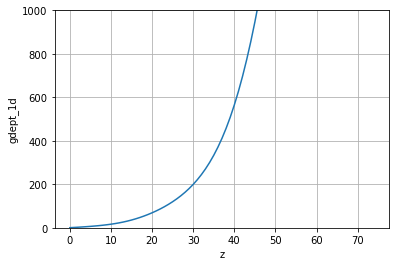

In [8]:
ds_meshZ['gdept_1d'].plot()
plt.ylim([0,1000.])
plt.grid(True)

In [9]:
ds_meshZ['gdept_1d']

<xarray.DataArray 'gdept_1d' (t: 1, z: 75)>
array([[5.057600e-01, 1.555855e+00, 2.667682e+00, 3.856280e+00, 5.140361e+00,
        6.543034e+00, 8.092518e+00, 9.822750e+00, 1.177368e+01, 1.399104e+01,
        1.652532e+01, 1.942980e+01, 2.275762e+01, 2.655830e+01, 3.087456e+01,
        3.574020e+01, 4.118002e+01, 4.721189e+01, 5.385064e+01, 6.111284e+01,
        6.902168e+01, 7.761116e+01, 8.692943e+01, 9.704131e+01, 1.080303e+02,
        1.200000e+02, 1.330758e+02, 1.474062e+02, 1.631645e+02, 1.805499e+02,
        1.997900e+02, 2.211412e+02, 2.448906e+02, 2.713564e+02, 3.008875e+02,
        3.338628e+02, 3.706885e+02, 4.117938e+02, 4.576256e+02, 5.086399e+02,
        5.652923e+02, 6.280260e+02, 6.972586e+02, 7.733683e+02, 8.566789e+02,
        9.474479e+02, 1.045854e+03, 1.151991e+03, 1.265861e+03, 1.387377e+03,
        1.516364e+03, 1.652568e+03, 1.795671e+03, 1.945295e+03, 2.101027e+03,
        2.262422e+03, 2.429025e+03, 2.600380e+03, 2.776039e+03, 2.955570e+03,
        3.138565e+03

>> ## Define dictionnaries for variables to plot 

In [68]:
#nam_ocevel={'nam_var':'ocevel','name_U':'vozocrtx','name_V':'vomecrty','nam_scal':2.,'nam_norm':0.2,'nam_lim':[0,0.1,0.01],'units':'ms-1'}
nam_ocevel={'nam_var':'ocevel','name_U':'vozocrtx','name_V':'vomecrty','nam_scal':20,'nam_norm':0.4,'nam_lim':[0,0.4,0.02],'units':'ms-1'}
nam_icevel={'nam_var':'icevel','name_U':'sivelu','name_V':'sivelv','nam_scal':0.5,'nam_norm':0.01,'nam_lim':[0,0.1,0.01],'units':'ms-1'}
nam_winvel={'nam_var':'winvel','name_U':'uwspd10','name_V':'vwspd10','nam_scal':40.,'nam_norm':1.,'nam_lim':[0.,4.,0.25],'units':'ms-1'}
nam_icethic={'nam_var':'sivolu','name_U':'-','name_V':'-','nam_scal':1.,'nam_norm':0.01,'nam_lim':[0,5.,0.5],'units':'m'}
nam_ocetem={'nam_var':'votemper','name_U':'-','name_V':'-','nam_scal':1.,'nam_norm':0.01,'nam_lim':[-2.,10.,0.5],'units':'DegC'}

In [51]:
nam_ocetem

{'nam_var': 'votemper',
 'name_U': '-',
 'name_V': '-',
 'nam_scal': 1.0,
 'nam_norm': 0.01,
 'nam_lim': [0, 10.0, 1.0],
 'units': 'DegC'}

>> # Plots

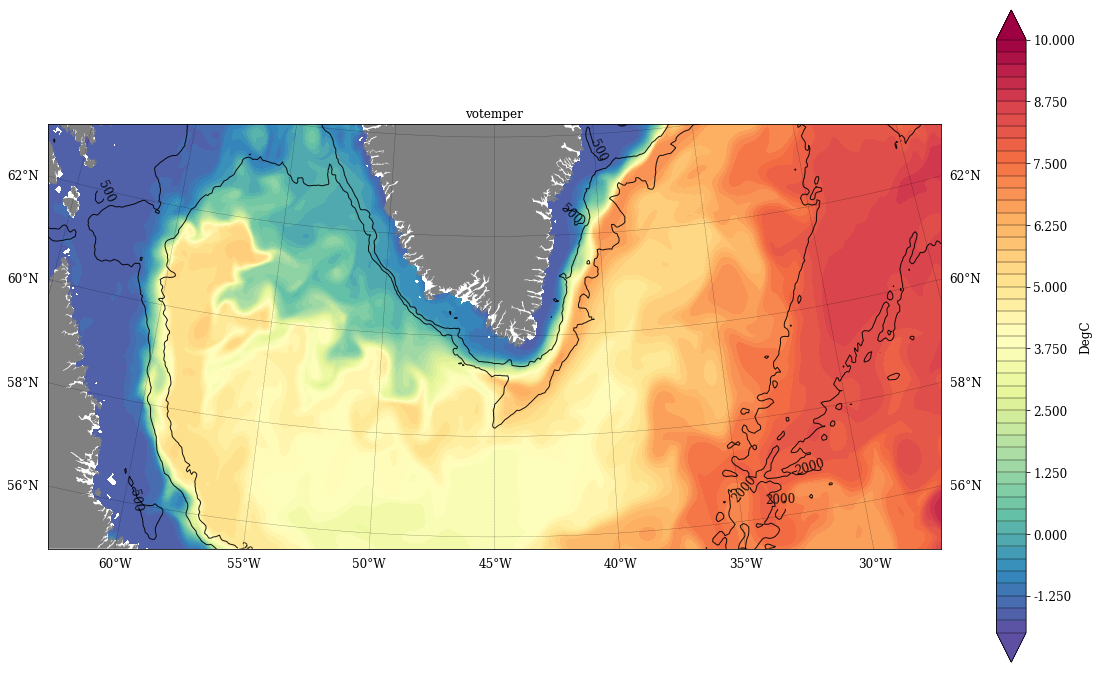

In [69]:

#PLOTS=[nam_icethic,nam_ocevel,nam_winvel]
#PLOTS=[nam_winvel]
PLOTS=[nam_icevel]
PLOTS=[nam_ocetem]

for doplot in PLOTS:
        m_alpha=1.
        plt.figure(figsize=(20,15))

        zoutmap=Arc_Bat(ztype='iso2')
        if doplot['nam_var'] == 'ocevel' or doplot['nam_var'] == 'icevel' or doplot['nam_var'] == 'winvel': 
                ds_toPlot=ds_Glo
                Arc_plotVec(np.array(ds_toPlot['nav_lon']), np.array(ds_toPlot['nav_lat']), \
                            np.array(ds_toPlot[doplot['name_U']][0,:,:])*m_alpha, \
                            np.array(ds_toPlot[doplot['name_V']][0,:,:])*m_alpha, \
                            doplot)
        else: 
                ds_toPlot=ds_Glo
                Arc_plot(np.array(ds_toPlot['nav_lon']), np.array(ds_toPlot['nav_lat']), \
                         np.array(ds_toPlot[doplot['nam_var']][0,:,:])*m_alpha, \
                         doplot)                    
        
        #plt.savefig('./'+CONFIG+'-'+CASE+'_'+doplot['nam_var']+'.pdf')


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in sqrt
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


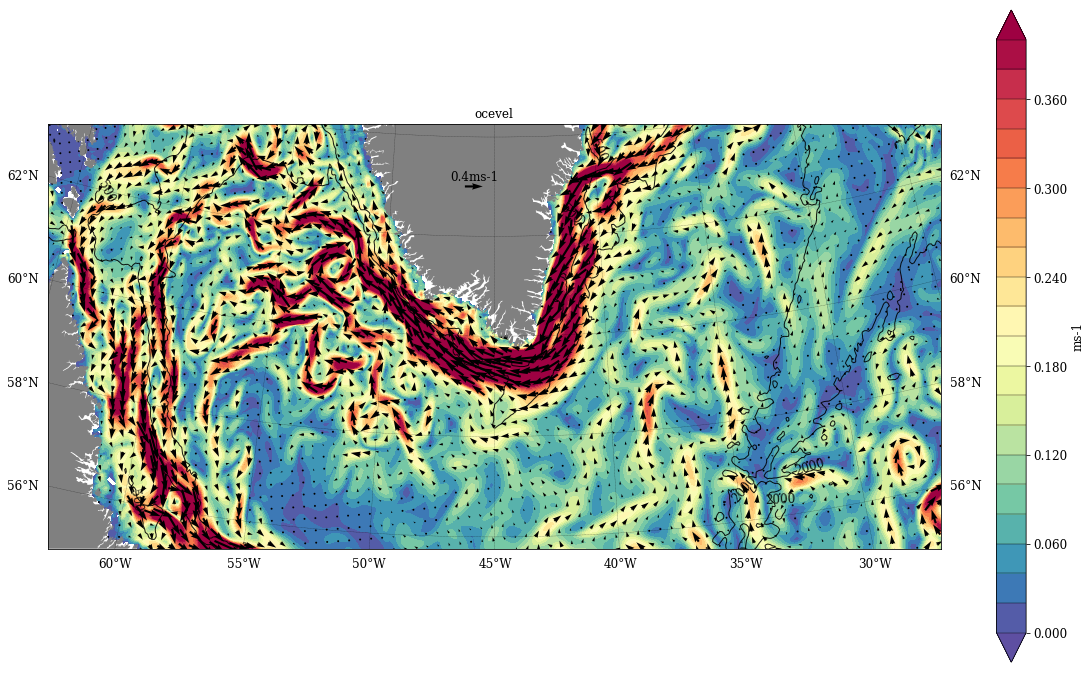

In [71]:
#PLOTS=[nam_icethic,nam_ocevel,nam_winvel]
#PLOTS=[nam_winvel]
PLOTS=[nam_ocevel]

for doplot in PLOTS:
        m_alpha=1.
        plt.figure(figsize=(20,15))

        zoutmap=Arc_Bat(ztype='iso2')
        if doplot['nam_var'] != 'sivolu' : 
                if  doplot['nam_var'] == 'icevel' :
                    ds_toPlot=ds_ice
                else: 
                    ds_toPlot=ds_Glo
                Arc_plotVec(np.array(ds_toPlot['nav_lon']), np.array(ds_toPlot['nav_lat']), \
                            np.array(ds_toPlot[doplot['name_U']][0,:,:])*m_alpha, \
                            np.array(ds_toPlot[doplot['name_V']][0,:,:])*m_alpha, \
                            doplot)
        else: 
                ds_toPlot=ds_ice
                Arc_plot(np.array(ds_toPlot['nav_lon']), np.array(ds_toPlot['nav_lat']), \
                         np.array(ds_toPlot[doplot['nam_var']][0,:,:])*m_alpha, \
                         doplot)                    
        
        #plt.savefig('./'+CONFIG+'-'+CASE+'_'+doplot['nam_var']+'.pdf')

